<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Tarefa4_DigitosMnist_Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 4 - Dígitos MNIST com rede totalmente conectada

O objetivo é adaptar o classificador mostrado para a base Fashion MNIST para a base de Dígitos do MNIST, que contem amostras de dígitos manuscritos de 0 a 9, devidamente rotulados. 

O classificador deve treinar até atingir acurácia de 99% e ser interrompido por uma callback. O treinamento deve acabar antes de se completar 10 épocas. 

Você deve completar os trechos indicados do código. 




In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels))

test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

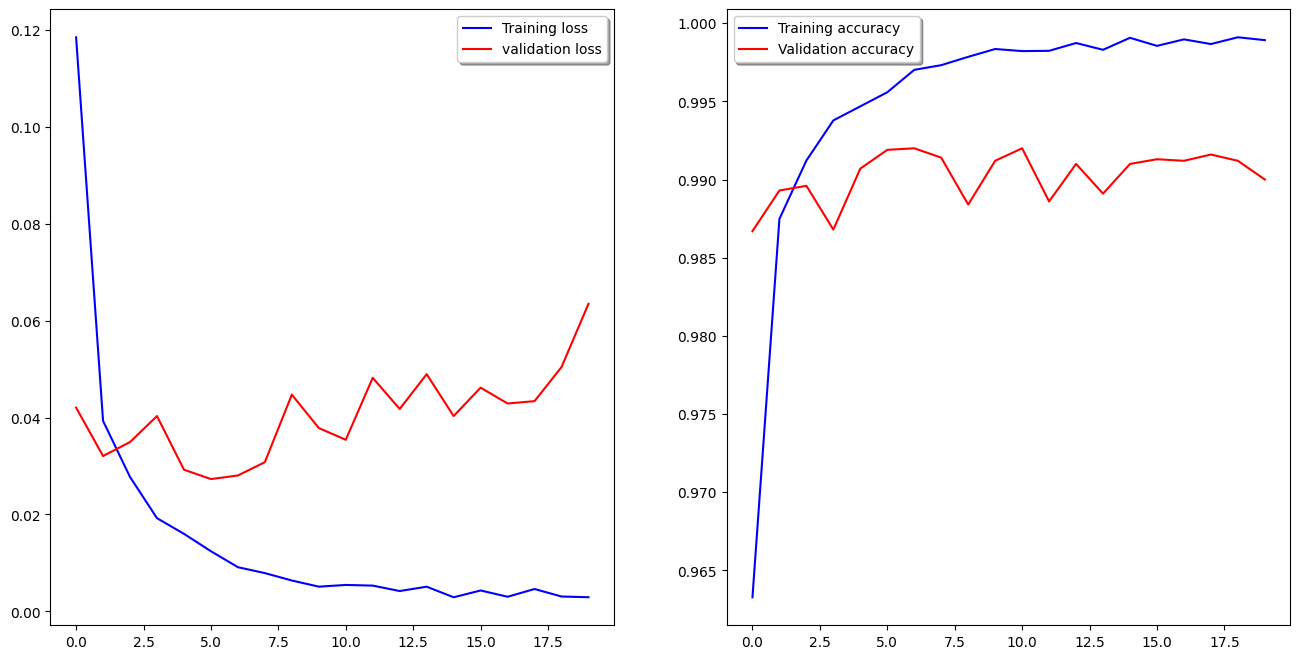

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Com callback

In [ ]:


import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAtingiu acc > 0.99, cancelando treinamento")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), callbacks=[callbacks])

test_loss = model.evaluate(test_images, test_labels)



2.12.0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)       

## AutoKeras

In [ ]:
import tensorflow as tf

!pip install autokeras

import autokeras as ak



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 97.2 MB/s eta 0:00:00


In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images / 255.0

test_images=test_images/255.0


In [ ]:
# It tries 10 different models.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Feed the structured data classifier with training data.
clf.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))
# Predict with the best model.
predicted_y = clf.predict(test_images)
# Evaluate the best model with testing data.
print(clf.evaluate(test_images, test_labels))

Trial 1 Complete [00h 02m 13s]
val_loss: 0.03144184872508049

Best val_loss So Far: 0.03144184872508049
Total elapsed time: 00h 02m 13s
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1531 - accuracy: 0.9535 - val_loss: 0.0582 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0719 - accuracy: 0.9780 - val_loss: 0.0562 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0596 - accuracy: 0.9818 - val_loss: 0.0431 - val_accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0343 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0390 - val_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0356 - val_accuracy: 0

313/313 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9904
[0.032917752861976624, 0.9904000163078308]


In [ ]:
model_AutoKeras = clf.export_model()
model_AutoKeras.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             